In [1]:
import pandas as pd
import numpy as np
import os.path
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import WordNetLemmatizer
import nltk

In [2]:
path = os.getcwd()
path
parent_folder, current_folder = os.path.split(path)
parent_folder

'/Users/jamoth/DSR/DSRCompTwo'

In [3]:
df = pd.read_csv(parent_folder + '/0.Raw_data/train/Combined_News_DJIA_train.csv')
df.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0.0,"b""Georgia 'downs two Russian warplanes' as cou...",NaN,b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1.0,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',NaN
2,2008-08-12,0.0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0.0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""",NaN,b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1.0,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Bank analyst forecast Georgian crisis

In [4]:
# combine all text headlines together in one text and convert to string
subdf = df.iloc[:,2:27] 
subdf = subdf.applymap(str)
s = subdf.apply(lambda x: ''.join(x), axis=1)

# replace the b' and b" which are in the beginning of some headlines
s = s.str.replace("b'","")
s = s.str.replace('b"','')

In [5]:
# create a new dataframe with all headlines and the overall word count
df1 = s.to_frame(name='headlines')
df1['lengths'] = df1['headlines'].apply(len)
df1['label'] = df['Label']
df1['date'] = df['Date']

In [6]:
df1.head(5)

,headlines,lengths,label,date
0,Georgia 'downs two Russian warplanes' as count...,2163,0.0,2008-08-08
1,Why wont America and Nato help us? If they won...,1542,1.0,2008-08-11
2,Remember that adorable 9-year-old who sang at ...,2087,0.0,2008-08-12
3,U.S. refuses Israel weapons to attack Iran: r...,1840,0.0,2008-08-13
4,All the experts admit that we should legalise ...,1761,1.0,2008-08-14


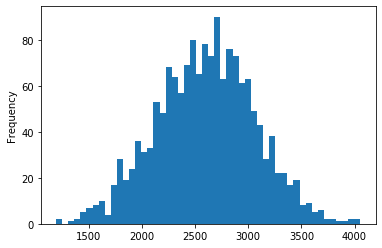

In [7]:
# plot the distribution of text lengths

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df1['lengths'].plot(bins=50,kind = 'hist')

In [8]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Lower case of all words
    2. Remove all punctuation
    3. Remove all stopwords
    4. Returns a list of the cleaned text
    """
    
    # transforms all to lower case words
    mess = mess.lower()
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word not in stopwords.words('english')]

In [9]:
# test if text_process function works 
df1['headlines'].head(5).apply(text_process)

0    [georgia, downs, two, russian, warplanes, coun...
1    [wont, america, nato, help, us, wont, help, us...
2    [remember, adorable, 9yearold, sang, opening, ...
3    [us, refuses, israel, weapons, attack, iran, r...
4    [experts, admit, legalise, drugs, war, south, ...
Name: headlines, dtype: object

In [10]:
nltk.download('wordnet')

# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

nrows = len(df1)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df1.loc[row]['headlines']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

df1['headlines'] = lemmatized_text_list

[nltk_data] Downloading package wordnet to /Users/jamoth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# create CountVectorizer with the predefined function
bow_transformer = CountVectorizer(analyzer=text_process)
bow = bow_transformer.fit_transform(df1['headlines'])
bow

<1584x61915 sparse matrix of type '<class 'numpy.int64'>'
	with 370990 stored elements in Compressed Sparse Row format>

In [12]:
# test Countvectorizer with a text subset
test_news = df1['headlines'][0:1]
print(test_news)
bow_test = bow_transformer.transform(test_news)
print(bow_test)

0    Georgia 'downs two Russian warplanes' as count...
Name: headlines, dtype: object
  (0, 45)	1
  (0, 223)	1
  (0, 1814)	1
  (0, 2641)	1
  (0, 2908)	1
  (0, 2928)	1
  (0, 3277)	1
  (0, 4464)	1
  (0, 4548)	1
  (0, 5089)	1
  (0, 5243)	1
  (0, 5657)	1
  (0, 6098)	1
  (0, 6659)	1
  (0, 6697)	1
  (0, 7032)	1
  (0, 7068)	1
  (0, 7507)	1
  (0, 9011)	1
  (0, 9129)	1
  (0, 9548)	1
  (0, 9615)	1
  (0, 10118)	2
  (0, 10383)	1
  (0, 10770)	1
  :	:
  (0, 55755)	1
  (0, 56184)	1
  (0, 56293)	2
  (0, 56703)	2
  (0, 57004)	1
  (0, 57081)	1
  (0, 57323)	1
  (0, 57438)	1
  (0, 57815)	3
  (0, 58480)	1
  (0, 58521)	1
  (0, 59209)	3
  (0, 59217)	1
  (0, 59339)	1
  (0, 59347)	1
  (0, 59424)	1
  (0, 60155)	1
  (0, 60492)	1
  (0, 60769)	1
  (0, 60773)	2
  (0, 60985)	2
  (0, 61252)	1
  (0, 61321)	1
  (0, 61559)	1
  (0, 61675)	1


In [13]:
# just check an example vector and what word is encoded
print (bow_transformer.get_feature_names()[10401])

casejehovahs


In [14]:
# create a TFIDF transformer
tfidf_transformer = TfidfTransformer().fit(df1bow)

NameError: name 'df1_bow' is not defined

In [18]:
# test TFIDF with a text subsettest an 
tfidf_test = tfidf_transformer.transform(bow_test)
print(tfidf_test)

  (0, 64145)	0.09068230370381965
  (0, 64028)	0.045576080200394276
  (0, 63789)	0.022094706467858275
  (0, 63720)	0.0267701753317257
  (0, 63443)	0.05122578091550029
  (0, 63227)	0.04106077502865073
  (0, 63223)	0.09068230370381965
  (0, 62933)	0.05528776426494724
  (0, 62581)	0.07588092485985366
  (0, 61832)	0.058686724361995984
  (0, 61758)	0.04312282369593797
  (0, 61755)	0.09068230370381965
  (0, 61624)	0.09068230370381965
  (0, 61616)	0.06297385825603177
  (0, 60909)	0.09068230370381965
  (0, 60868)	0.050109787723431866
  (0, 60192)	0.045485648253768024
  (0, 59794)	0.0743032531218618
  (0, 59677)	0.03883509981541467
  (0, 59414)	0.08589173850988947
  (0, 59338)	0.026405807633816225
  (0, 59036)	0.05005689895776237
  (0, 58623)	0.06143837678402095
  (0, 58503)	0.058686724361995984
  (0, 58046)	0.04818010422312822
  :	:
  (0, 11087)	0.07985634013788401
  (0, 10679)	0.03436689425608042
  (0, 10401)	0.07934247101016284
  (0, 9883)	0.06856698433533918
  (0, 9812)	0.047860760796060345
